### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [581]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [584]:
data = pd.read_csv('data/coupons.csv')

In [586]:
#Look at the data structure of the coupons.csv
data.head(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [589]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

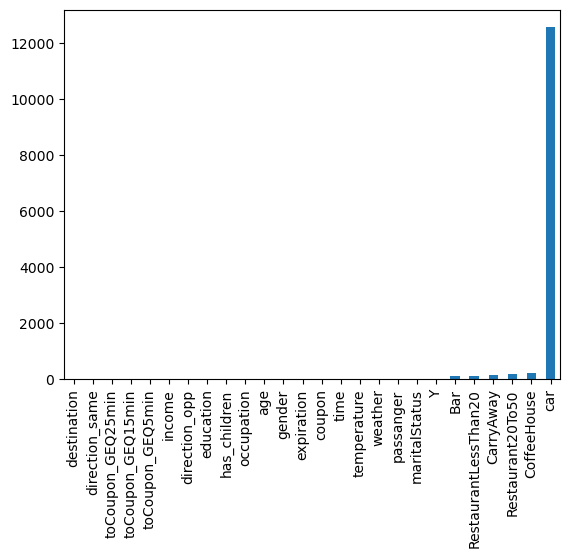

In [592]:
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [595]:
print(data.loc[data['car'].isnull()].count())

destination             12576
passanger               12576
weather                 12576
temperature             12576
time                    12576
coupon                  12576
expiration              12576
gender                  12576
age                     12576
maritalStatus           12576
has_children            12576
education               12576
occupation              12576
income                  12576
car                         0
Bar                     12469
CoffeeHouse             12359
CarryAway               12425
RestaurantLessThan20    12446
Restaurant20To50        12387
toCoupon_GEQ5min        12576
toCoupon_GEQ15min       12576
toCoupon_GEQ25min       12576
direction_same          12576
direction_opp           12576
Y                       12576
dtype: int64


In [597]:
#Since this is a driving data set, so all the customers already have access to the car. This implicitly impied that very data row already has car Therefore, 'car' column is not needed
# Deicide to remove car column
data1 = data.drop('car', axis=1)
data1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [599]:
#drop NA rows in the data
data1['Bar'] = data1['Bar'].dropna()
data1['CoffeeHouse'] = data1['CoffeeHouse'].dropna()
data1['CarryAway'] = data1['CarryAway'].dropna()
data1['RestaurantLessThan20'] = data1['RestaurantLessThan20'].dropna()
data1['Restaurant20To50'] = data1['Restaurant20To50'].dropna()

In [601]:
#Show that there are no more non-null objects
data1.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [604]:
#Calculate the % of oberservations chose to accept the coupon.  
percentage_of_y = (data1[data1['Y'] == 1].shape[0]/data1['Y'].count())*100
print("%.0f%%" % (data1[data1['Y'] == 1].shape[0]/data1['Y'].count() * 100))
#57% of the observations chose Y to accept the coupon

57%


5. Use a bar plot to visualize the `coupon` column.

[None, None, None, None, None]

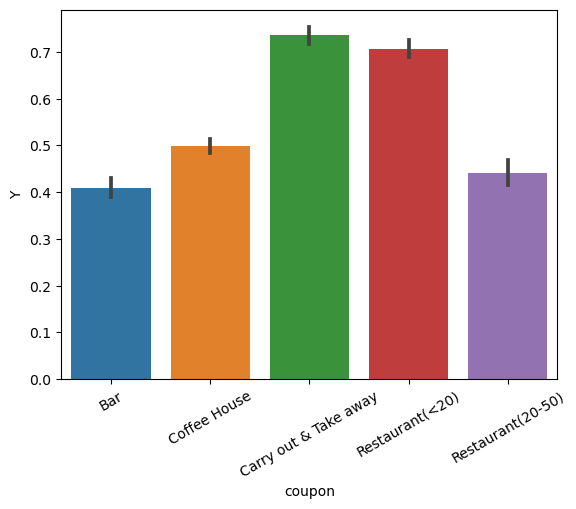

In [607]:
# Use a seaborn barplot to visualize the coupon date by type of coupon and accept %
# order list used to reorganized the x-label. The order matches what the row data shows
order_list = ['Bar','Coffee House','Carry out & Take away','Restaurant(<20)','Restaurant(20-50)']
ax = sns.barplot(data=data1,x='coupon',y='Y',order=order_list)
#ax = sns.barplot(data=data1,x='coupon',y='Y')
plt.setp(ax.get_xticklabels(), rotation=30)

6. Use a histogram to visualize the temperature column.

C:\Users\spide\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


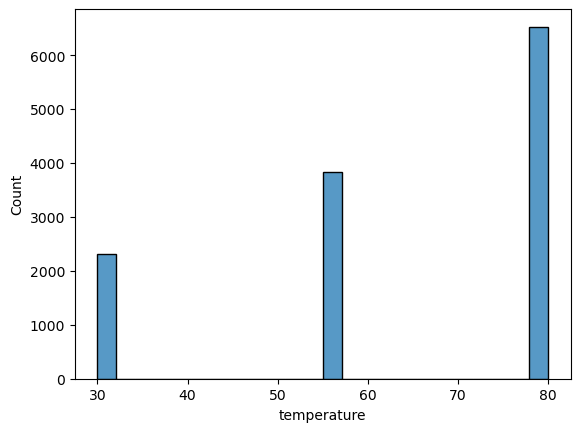

In [611]:
#using seaborn to create a histogram
ax = sns.histplot(data=data1,x='temperature')

C:\Users\spide\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[None, None, None, None, None]

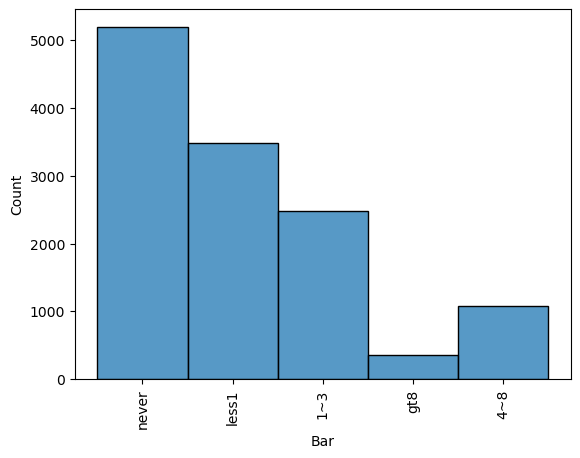

In [613]:
ax = sns.histplot(data=data1,x='Bar')
plt.setp(ax.get_xticklabels(), rotation=90)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [619]:
#isolate to only bar coupons data frame
data_bar_only = data1[['coupon']]
data_bar_only = data_bar_only[data_bar_only['coupon']=='Bar']
data_bar_only.head()

,coupon
9,Bar
13,Bar
17,Bar
24,Bar
35,Bar


2. What proportion of bar coupons were accepted?


In [623]:
#find the count for total bar coupon sent out
data_bar_only = data1[['coupon']]
total_bar_coupon = data_bar_only[data_bar_only['coupon']=='Bar'].shape[0]
print(total_bar_coupon)

#find the count for accepted bar coupon and used 
data_bar_only = data1[['coupon','Y']]
accept_bar_coupon = data_bar_only[(data_bar_only['coupon']=='Bar') & (data_bar_only['Y']== 1)].shape[0]
print(accept_bar_coupon)
prop_accepted_bar_coupon = accept_bar_coupon/total_bar_coupon

print("%.0f%%" % (prop_accepted_bar_coupon * 100))
# 41% is the proportion of bar coupons that were accepted

2017
827
41%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [659]:
#isolate only columns that I need for this analysis
data_bar_only = data1[['Bar','coupon','Y']]

#isolate to only rows with Bar Coupon sent
data_bar_only = data_bar_only[(data_bar_only['coupon']=='Bar')]

total_bar_coupon_3_fewer = data_bar_only[(data_bar_only['Bar']=='never')|(data_bar_only['Bar']=='less1')|(data_bar_only['Bar']=='1~3')].shape[0]
accept_bar_coupon_3_fewer = data_bar_only[((data_bar_only['Bar']=='never')|(data_bar_only['Bar']=='less1')|(data_bar_only['Bar']=='1~3'))&
                                            (data_bar_only['Y']== 1)].shape[0]

prop_accepted_bar_coupon_3_fewer = accept_bar_coupon_3_fewer/total_bar_coupon_3_fewer

print(total_bar_coupon_3_fewer)
print(accept_bar_coupon_3_fewer)
print("%.0f%%" % (prop_accepted_bar_coupon_3_fewer * 100))
#37% is acceptance rate of bar coupon for those who goes to bar 3 times and fewer a month

1797
666
37%


In [657]:
total_bar_coupon_4_greater = data_bar_only[(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8')].shape[0]
accept_bar_coupon_4_greater = data_bar_only[((data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))&
                                            (data_bar_only['Y']== 1)].shape[0]

prop_accepted_bar_coupon_4_greater = accept_bar_coupon_4_greater/total_bar_coupon_4_greater

print(total_bar_coupon_4_greater)
print(accept_bar_coupon_4_greater)
print("%.0f%%" % (prop_accepted_bar_coupon_4_greater * 100))
#77% is acceptance rate of bar coupon for those who goes to bar 8 times and greater a month

199
153
77%


In [630]:
#The acceptance rate for going to bar is 77% customers who visit bars 8 times or greater and 37% for 3times or feweer


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [633]:
#isolate only columns that I need for this analysis
data_bar_only = data1[['age', 'Bar','coupon','Y']]

#isolate to only rows with Bar Coupon sent
data_bar_only = data_bar_only[(data_bar_only['coupon']=='Bar')]

#Total coupon Bar sent
total_bar_coupon = data_bar_only[(data_bar_only['coupon']=='Bar')].shape[0]
print(total_bar_coupon)

#Accepted coupon Bar, Y==1
accept_bar_coupon = data_bar_only[data_bar_only['Y']== 1].shape[0]
print(accept_bar_coupon)

prop_accept_bar_coupon = accept_bar_coupon/total_bar_coupon
print("Accepted Coupon Bar Percentage: %.0f%%" % (prop_accept_bar_coupon * 100))

#find the total number of people who go to bar more than once a month and are over age of 25
total_bar_coupon_more_one_mo_greater_25 = data_bar_only[((data_bar_only['age']=='26')|(data_bar_only['age']=='31')|(data_bar_only['age']=='36')|(data_bar_only['age']=='41')|(data_bar_only['age']=='46')|(data_bar_only['age']=='50plus'))
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))].shape[0]

#find the accepted number of people who go to bar more than once a month and are over age of 25 and Y==1
accept_bar_coupon_more_one_mo_greater_25 = data_bar_only[((data_bar_only['age']=='26')|(data_bar_only['age']=='31')|(data_bar_only['age']=='36')|(data_bar_only['age']=='41')|(data_bar_only['age']=='46')|(data_bar_only['age']=='50plus'))
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))
                                        &(data_bar_only['Y']== 1)].shape[0]

prop_accept_bar_coupon_more_one_mo_greater_25 = accept_bar_coupon_more_one_mo_greater_25/total_bar_coupon_more_one_mo_greater_25

print(accept_bar_coupon_more_one_mo_greater_25)
print(total_bar_coupon_more_one_mo_greater_25)
print("Accepted Coupon Bar (more than once a month and over 25Yrs Old) Percentage: %.0f%%" % (prop_accept_bar_coupon_more_one_mo_greater_25 * 100))

#Looks like for drivers that are 25 years old and goes to bars more than once a month would accept coupon 70% vs 41% of general population

2017
827
Accepted Coupon Bar Percentage: 41%
292
420
Accepted Coupon Bar (more than once a month and over 25Yrs Old) Percentage: 70%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [655]:
#isolate only columns that I need for this analysis, from #4 question, we know the acceptance of general population is at 41%
#No need to redo the general population calculations again
data_bar_only = data1[['passanger','occupation','Bar','coupon','Y']]

#isolate to only rows with Bar Coupon sent
data_bar_only = data_bar_only[(data_bar_only['coupon']=='Bar')]

#find the total number of people who go to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
total_bar_coupon_more_one_mo_not_kids_not_fff = data_bar_only[(data_bar_only['occupation']!='Farming Fishing & Forestry')&(data_bar_only['passanger']!='Kids(s)')
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))].shape[0]

#find the accepted number of people who go to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
accept_bar_coupon_more_one_mo_not_kids_not_fff = data_bar_only[(data_bar_only['occupation']!='Farming Fishing & Forestry')&(data_bar_only['passanger']!='Kids(s)')
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))
                                        &(data_bar_only['Y']== 1)].shape[0]

#calculate the acceptance %
prop_accept_bar_coupon_more_one_mo_not_kids_not_fff = accept_bar_coupon_more_one_mo_not_kids_not_fff/total_bar_coupon_more_one_mo_not_kids_not_fff

print("Total drivers (go to bars more than once a month) & (not a kid) & (not farming, fishing, or forestry): ", total_bar_coupon_more_one_mo_not_kids_not_fff)
print("Accepted drivers (go to bars more than once a month) & (not a kid) & (not farming, fishing, or forestry): ", accept_bar_coupon_more_one_mo_not_kids_not_fff)
print("Accepted Coupon Bar (!Farming Fishing Foresty and !Kids) Percentage: %.0f%%" % (prop_accept_bar_coupon_more_one_mo_not_kids_not_fff * 100))

Total drivers (go to bars more than once a month) & (not a kid) & (not farming, fishing, or forestry):  596
Accepted drivers (go to bars more than once a month) & (not a kid) & (not farming, fishing, or forestry):  410
Accepted Coupon Bar (!Farming Fishing Foresty and !Kids) Percentage: 69%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [646]:
data_bar_only = data1[['age','passanger','occupation','income', 'maritalStatus','Bar','RestaurantLessThan20','coupon','Y']]

#isolate to only rows with Bar Coupon sent
data_bar_only = data_bar_only[(data_bar_only['coupon']=='Bar')]

#Find acceptance rate for "go to bars more than once a month, had passengers that were not a kid, and were not widowed"
total_bar_coupon_more_one_mo_not_kids_not_wid = data_bar_only[(data_bar_only['maritalStatus']!='Widowed')&(data_bar_only['passanger']!='Kids(s)')
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))].shape[0]

accept_bar_coupon_more_one_mo_not_kids_not_wid = data_bar_only[(data_bar_only['maritalStatus']!='Widowed')&(data_bar_only['passanger']!='Kids(s)')
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))
                                        &(data_bar_only['Y']== 1)].shape[0]

prop_bar_coupon_more_one_mo_not_kids_not_wid = accept_bar_coupon_more_one_mo_not_kids_not_wid/total_bar_coupon_more_one_mo_not_kids_not_wid

print(total_bar_coupon_more_one_mo_not_kids_not_wid)
print(accept_bar_coupon_more_one_mo_not_kids_not_wid)
print("Accepted Bar Coupon (!Widowed and !Kids and more than once) Percentage: %.0f%%" % (prop_bar_coupon_more_one_mo_not_kids_not_wid * 100))
print("")

#Find acceptance rate "go to bars more than once a month and are under age of 30"
total_bar_coupon_more_one_mo_under_30 = data_bar_only[((data_bar_only['age']=='below21')|(data_bar_only['age']=='21')|(data_bar_only['age']=='26'))
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))].shape[0]

accept_bar_coupon_more_one_mo_under_30 = data_bar_only[((data_bar_only['age']=='below21')|(data_bar_only['age']=='21')|(data_bar_only['age']=='26'))
                                        &((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))
                                        &(data_bar_only['Y']== 1)].shape[0]

prop_bar_coupon_more_one_mo_under_30 = accept_bar_coupon_more_one_mo_under_30/total_bar_coupon_more_one_mo_under_30

print(total_bar_coupon_more_one_mo_under_30)
print(accept_bar_coupon_more_one_mo_under_30)
print("Accepted Bar Coupon (more than once and under 30) Percentage: %.0f%%" % (prop_bar_coupon_more_one_mo_under_30 * 100))
print("")

#Find acceptance rate "go to cheap restaurants more than 4 times a month and income is less than 50K"
#print(data_bar_only[(data_bar_only['income']=='$12500 - $24999')])
total_bar_coupon_cheap_rest_under_50K =  data_bar_only[((data_bar_only['income']=='Less than $12500')|(data_bar_only['income']=='$12500 - $24999')|(data_bar_only['income']=='$25000 - $37499')|(data_bar_only['income']=='$37500 - $49999'))
                                        &((data_bar_only['RestaurantLessThan20']=='4~8')|(data_bar_only['RestaurantLessThan20']=='gt8'))].shape[0]

accept_bar_coupon_cheap_rest_under_50K =  data_bar_only[((data_bar_only['income']=='Less than $12500')|(data_bar_only['income']=='$12500 - $24999')|(data_bar_only['income']=='$25000 - $37499')|(data_bar_only['income']=='$37500 - $49999'))
                                        &((data_bar_only['RestaurantLessThan20']=='4~8')|(data_bar_only['RestaurantLessThan20']=='gt8'))
                                        &(data_bar_only['Y']== 1)].shape[0]

prop_bar_coupon_cheap_rest_under_50K = accept_bar_coupon_cheap_rest_under_50K/total_bar_coupon_cheap_rest_under_50K

print(total_bar_coupon_cheap_rest_under_50K)
print(accept_bar_coupon_cheap_rest_under_50K)
print("Accepted Bar Coupon (go to cheap restaurants more than 4 times a month and income is less than 50K) Percentage: %.0f%%" % (prop_bar_coupon_cheap_rest_under_50K * 100))
print("")

596
410
Accepted Bar Coupon (!Widowed and !Kids and more than once) Percentage: 69%

345
249
Accepted Bar Coupon (more than once and under 30) Percentage: 72%

344
156
Accepted Bar Coupon (go to cheap restaurants more than 4 times a month and income is less than 50K) Percentage: 45%



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on my observations, drives who have a higher percentages of accepting the bar coupons are the ones:
1. Drivers who already goes to bars frequently at leasat 1 times times a month would accept the coupon more than 69%.  This is the key factor
2. Other attributes do help increase the acceptance rate by a few single % points, but is not the main contributing factor.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [663]:
total_bar_coupon_1_greater = data_bar_only[(data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8')].shape[0]
accept_bar_coupon_1_greater = data_bar_only[((data_bar_only['Bar']=='1~3')|(data_bar_only['Bar']=='4~8')|(data_bar_only['Bar']=='gt8'))&
                                            (data_bar_only['Y']== 1)].shape[0]

prop_accepted_bar_coupon_1_greater = accept_bar_coupon_1_greater/total_bar_coupon_1_greater
print("Accepted Bar Coupon (go to bar at least 1 times a month) Percentage: %.0f%%" % (prop_accepted_bar_coupon_1_greater * 100))


Accepted Bar Coupon (go to bar at least 1 times a month) Percentage: 69%
